<a href="https://colab.research.google.com/github/Shoaib34/Employee-Satisfaction-ML/blob/main/ML_Housing_Prediction%20/california-housing-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [24]:
# Step 1: Loading the California housing data set
california = fetch_california_housing()

# Creating a panda dataframe
data = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable (Median House Value)
data['MedHouseVal'] = california.target

In [25]:
# Step 2: Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [26]:
#Step 3: Get summary statistics
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

In [27]:
#step 4: Make sure there is no null values
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


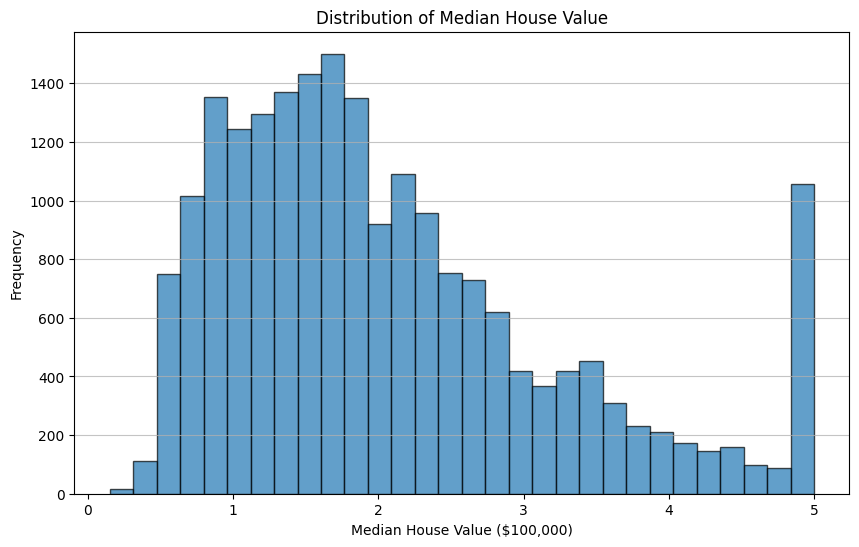

In [28]:
#Step 5 Visualize the distribution of the target variable
plt.figure(figsize=(10,6))
plt.hist(data['MedHouseVal'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

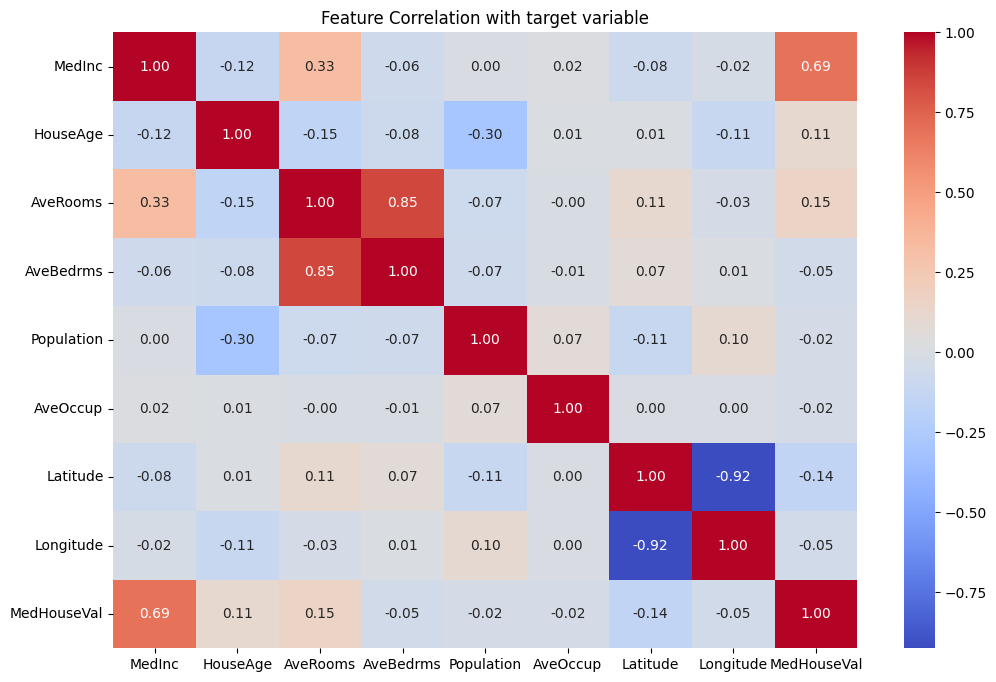

In [29]:
#Step 6: Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation with target variable')
plt.show()

In [36]:
#Step 7 Settng up our training and testing datas
# Using the data from then heatmap I will choose which data I want to train on(these 3 values have the strongest correlations to the target)
X = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Step 8: Train the Linear Regression model
model = LinearRegression()
#.fit()trains the model using the varibles
model.fit(X_train, y_train)


LinearRegression()

In [38]:
# Step 9: Make predictions
y_pred = model.predict(X_test)

In [39]:
# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 0.74


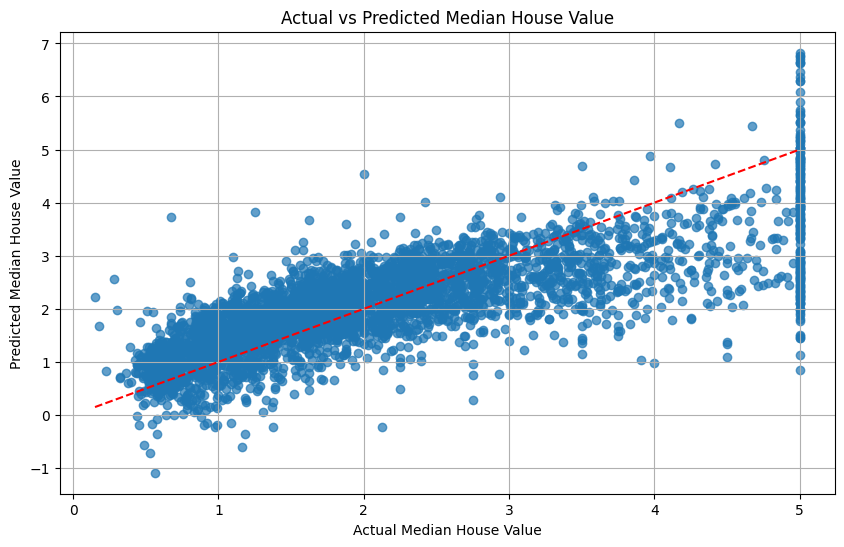

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.title('Actual vs Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.grid()
plt.show()
